In [1]:
from mpl_toolkits import mplot3d

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from utils_kernel import euclidean_kernel, hard_geodesics_euclidean_kernel, hard_landmarks_geodesics_euclidean_kernel
from utils_visualization import plot_kernel

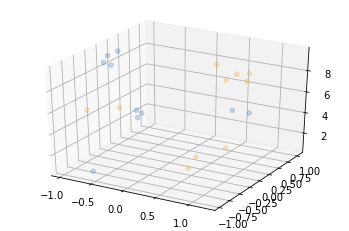

In [8]:
ax = plt.axes(projection='3d')

height = 10
noise = 0.15
x_width = 1
y_width = 1
sample = 10
curls = 1.2

# Data for a three-dimensional line
#zline = np.linspace(0, height, 1000)
#xline = x_width*np.sin(zline/enrosques)
#yline = y_width*np.cos(zline/enrosques)
#ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = height * np.random.random(sample)
xdata = x_width*np.sin(zdata/curls) + noise * np.random.randn(sample)
ydata = y_width*np.cos(zdata/curls) + noise * np.random.randn(sample)
ax.scatter3D(xdata, ydata, zdata, color='#edaf4c', alpha=0.3);

xdata2 = x_width*np.sin(zdata/curls+3.14) + noise * np.random.randn(sample)
ydata2 = y_width*np.cos(zdata/curls+3.14) + noise * np.random.randn(sample)
ax.scatter3D(xdata2, ydata2, zdata, color='#5586bd', alpha=0.3);

In [9]:
features1 = np.column_stack((xdata, ydata, zdata))
features2 = np.column_stack((xdata2, ydata2, zdata))
features = np.concatenate([features1,features2])

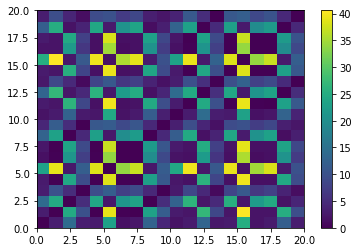

In [10]:
euclidean_matrix = euclidean_kernel(features)
plot_kernel(euclidean_matrix)

In [ ]:
geodesic_euclidean_matrix = hard_geodesics_euclidean_kernel(features, 100)
plot_kernel(geodesic_euclidean_matrix)

[[2.56985723 2.4015376  2.4076146  4.90825817 2.44161138 2.96059779
  5.08060457 1.80363132 6.80589685 2.57455944]
 [4.76239553 2.12854664 2.07060367 7.26094499 0.28338017 5.0500447
  7.47752069 0.77512041 8.85694542 0.        ]
 [3.22131812 7.37018768 7.1514119  1.97318329 7.16110467 3.19634569
  2.17809237 6.63026587 2.30365758 7.23865945]
 [0.         4.14886955 3.93009377 2.77382619 4.58088956 0.4769713
  3.02111785 4.34961933 4.88122484 4.76239553]
 [4.58088956 1.86869428 1.79227116 7.1833902  0.         4.86853873
  7.3999659  0.66832326 8.77939064 0.28338017]
 [4.88122484 9.03009439 8.81131861 2.37365454 8.77939064 4.81798602
  2.26214295 8.24855184 0.         8.85694542]
 [4.34961933 1.82801157 1.79760792 6.6525514  0.66832326 4.6372685
  6.86912711 0.         8.24855184 0.77512041]
 [4.68120814 1.95419132 1.94925224 7.0292059  0.43196723 4.96885731
  7.2457816  0.42183603 8.62520634 0.43172934]
 [2.98665364 7.13552319 6.91674741 1.723481   6.88698129 2.98309643
  1.93129804 6.

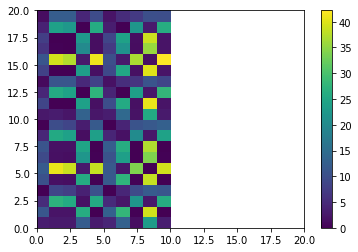

In [11]:
geodesic_euclidean_matrix = hard_landmarks_geodesics_euclidean_kernel(features, 10, 10)
plot_kernel(geodesic_euclidean_matrix)

In [ ]:
k = 400
euclidean_neighbors_idx = np.argpartition(euclidean_matrix[0,:],k)[:k]
euclidean_neighbors = features[euclidean_neighbors_idx]

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(euclidean_neighbors[:,0], euclidean_neighbors[:,1], euclidean_neighbors[:,2], c=euclidean_matrix[0,euclidean_neighbors_idx], cmap='Reds');

In [ ]:
k = 400
geodesic_neighbors_idx = np.argpartition(geodesic_euclidean_matrix[0,:],k)[:k]
geodesic_neighbors = features[geodesic_neighbors_idx]

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter3D(geodesic_neighbors[:,0], geodesic_neighbors[:,1], geodesic_neighbors[:,2],
             c=geodesic_euclidean_matrix[0,geodesic_neighbors_idx], cmap='Reds')

In [ ]:
(euclidean_neighbors_idx>=1000).mean()

In [ ]:
(geodesic_neighbors_idx>=1000).mean()